In [7]:
import pandas as pd
import sklearn.cluster as cluster
import seaborn as sns

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
data = pd.read_csv('Global_Superstore.csv', encoding='latin-1')

In [10]:
data.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [11]:
rel_data = data[['Market', 'Region', 'Category', 'Profit', 'Sales']]
rel_data[['Market']].value_counts()

Market
APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: count, dtype: int64

In [12]:
rel_data[['Market', 'Category', 'Profit', 'Sales']]

,Market,Category,Profit,Sales
0,US,Technology,762.1845,2309.650
1,APAC,Furniture,-288.7650,3709.395
2,APAC,Technology,919.9710,5175.171
3,EU,Technology,-96.5400,2892.510
4,Africa,Technology,311.5200,2832.960
...,...,...,...,...
51285,APAC,Office Supplies,4.5000,65.100
51286,US,Office Supplies,-1.1100,0.444
51287,US,Office Supplies,11.2308,22.920
51288,LATAM,Office Supplies,2.4000,13.440


In [13]:
kmeans = cluster.KMeans(n_clusters=7, init='k-means++')
kmeans = kmeans.fit(rel_data[['Profit', 'Sales']])
kmeans.cluster_centers_

c:\Users\Yoel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[3.64720472e+00, 6.48110903e+01],
       [2.41123610e+02, 1.55263013e+03],
       [1.21002811e+03, 4.99368307e+03],
       [8.97355095e+01, 8.13145487e+02],
       [3.03843397e+01, 3.49386289e+02],
       [4.54938547e+03, 1.35972883e+04],
       [4.85506600e+02, 2.73713755e+03]])

In [14]:
rel_data['Cluster'] = kmeans.labels_

C:\Users\Yoel\AppData\Local\Temp\ipykernel_8604\1591976817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rel_data['Cluster'] = kmeans.labels_


In [15]:
cluster_data = rel_data.sort_values(by='Cluster')
cluster_data

,Market,Region,Category,Profit,Sales,Cluster
51289,LATAM,Central,Office Supplies,1.8000,61.3800,0
27737,Africa,Africa,Office Supplies,5.0100,29.5800,0
27738,Canada,Canada,Office Supplies,29.5800,102.1800,0
27739,LATAM,North,Office Supplies,27.7600,64.6000,0
27740,LATAM,South,Office Supplies,4.4800,40.9600,0
...,...,...,...,...,...,...
1054,APAC,Southeast Asia,Furniture,-0.0525,2266.1475,6
1056,APAC,Oceania,Office Supplies,1202.0160,3606.3360,6
1057,APAC,Oceania,Office Supplies,604.8600,2367.3600,6
998,LATAM,South,Furniture,110.0000,2751.2000,6


<AxesSubplot: xlabel='Sales', ylabel='Profit'>

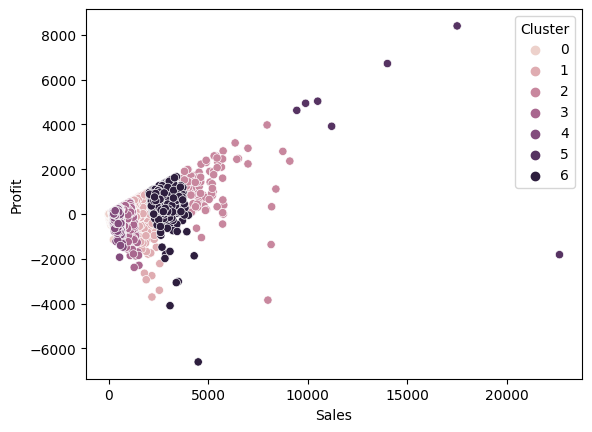

In [16]:
sns.scatterplot(x='Sales', y='Profit', hue='Cluster', data=cluster_data)

In [28]:
cluster_data.loc[cluster_data['Cluster'] == 0][['Market']].value_counts()

Market
LATAM     7536
US        7468
APAC      6958
EU        6437
EMEA      4087
Africa    3658
Canada     303
Name: count, dtype: int64